<a href="https://colab.research.google.com/github/gracepane/tugas-python/blob/main/tugas_minggu_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
ls

In [10]:
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [11]:
print("[INFO] loading images...")
imagePaths = paths.list_images("dataset")
data = []
labels = []

[INFO] loading images...


In [12]:
for imagePath in imagePaths:

	image = Image.open(imagePath)
	image = np.array(image.resize((150, 150))) / 255.0 #normalisasi
	data.append(image)

	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [13]:
print(labels)

['GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01',

In [14]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [15]:
print(labels)

[[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]


In [23]:
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(444, 150, 150, 3)
(148, 150, 150, 3)


In [24]:
from keras.layers import Convolution2D, MaxPooling2D, MaxPool2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

In [25]:
model1 = Sequential()
model1.add(Convolution2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(64, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(128, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(256, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))

#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 256)      

In [26]:
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [27]:
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

Epoch 1/25
14/14 [==============================] - 20s 1s/step - loss: 1.6043 - accuracy: 0.1914 - val_loss: 1.5159 - val_accuracy: 0.3446
Epoch 2/25
14/14 [==============================] - 20s 1s/step - loss: 1.4341 - accuracy: 0.4189 - val_loss: 1.3339 - val_accuracy: 0.3919
Epoch 3/25
14/14 [==============================] - 20s 1s/step - loss: 1.2727 - accuracy: 0.5068 - val_loss: 1.1947 - val_accuracy: 0.5270
Epoch 4/25
14/14 [==============================] - 20s 1s/step - loss: 1.1101 - accuracy: 0.5586 - val_loss: 1.0199 - val_accuracy: 0.5676
Epoch 5/25
14/14 [==============================] - 20s 1s/step - loss: 0.9283 - accuracy: 0.6509 - val_loss: 0.8639 - val_accuracy: 0.6486
Epoch 6/25
14/14 [==============================] - 20s 1s/step - loss: 0.7471 - accuracy: 0.7050 - val_loss: 0.7422 - val_accuracy: 0.7027
Epoch 7/25
14/14 [==============================] - 20s 1s/step - loss: 0.6023 - accuracy: 0.8041 - val_loss: 0.6746 - val_accuracy: 0.7635
Epoch 8/25
14/14 [==

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


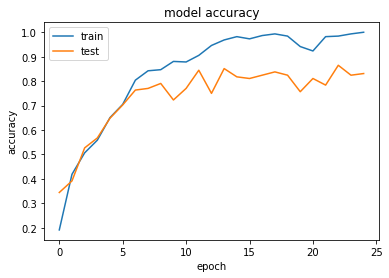

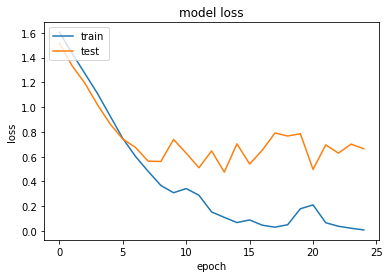

In [28]:
import matplotlib.pyplot as plt

print(H.history.keys())

plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [29]:
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.90      0.96      0.93        27
      GMB_03       0.83      0.86      0.85        29
      GMB_04       0.79      0.87      0.83        31
      GMB_05       0.79      0.72      0.75        32
      GMB_06       0.85      0.76      0.80        29

    accuracy                           0.83       148
   macro avg       0.83      0.83      0.83       148
weighted avg       0.83      0.83      0.83       148

